In [ ]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("heart.csv")

In [11]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
792,46,M,NAP,150,231,0,Normal,147,N,3.6,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
445,55,M,NAP,136,228,0,ST,124,Y,1.6,Flat,1
794,50,M,NAP,129,196,0,Normal,163,N,0.0,Up,0


In [ ]:
#Step1: Data Cleaning & Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Getting Summary of Numerical Columns In The Datset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#Getting Summary of All Column In The Dataset
df.describe(include = "all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [ ]:
#Checking For Empty Cells In The Dataset
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#Checking For Duplicate Values In The Dataset
df.duplicated().value_counts()

False    918
Name: count, dtype: int64

In [ ]:
#Checking For Unique Values In The Dataset
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [20]:
# Selecting Only Categorical Values In Dataset
categorical_column = df.select_dtypes(include = 'object').columns

In [21]:
#Converting Categorical Values To Numerical Value 
for col in categorical_column:
    print(col)
    print((df[col].unique()),list(range(df[col].nunique())))
    df[col].replace((df[col].unique()), range(df[col].nunique()), inplace = True)
    print('*' * 90)
    print()

Sex
['M' 'F'] [0, 1]
******************************************************************************************

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
******************************************************************************************

RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
******************************************************************************************

ExerciseAngina
['N' 'Y'] [0, 1]
******************************************************************************************

ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
******************************************************************************************



In [23]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [24]:
#Replacing 0 Vales In Cholesterol Column With KNN Imputer
df['Cholesterol'].replace(0, np.nan, inplace = True)

In [25]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
after_impute = imputer.fit_transform(df)
df = pd.DataFrame(after_impute, columns = df.columns)

In [27]:
df['Cholesterol'].isna().sum()

np.int64(0)

In [30]:
#Checking For Any Zero Values Left In Cholesterol Column
count = 0
for i in df['Cholesterol']:
    if i == 0:
        count += 1
print(count)

0


In [31]:
#Resetting Bloop Pressure Column
df['RestingBP'][df['RestingBP'] == 0]

449    0.0
Name: RestingBP, dtype: float64

In [32]:
from sklearn.impute import KNNImputer

df['RestingBP'].replace(0, np.nan, inplace = True)
imputer = KNNImputer(n_neighbors = 3)
after_impute = imputer.fit_transform(df)
df = pd.DataFrame(after_impute, columns = df.columns)

In [33]:
df['RestingBP'].unique

<bound method Series.unique of 0      140.0
1      160.0
2      130.0
3      138.0
4      150.0
       ...  
913    110.0
914    144.0
915    130.0
916    130.0
917    138.0
Name: RestingBP, Length: 918, dtype: float64>

In [34]:
df['RestingBP'].isnull().sum()

np.int64(0)

In [44]:
#Changing Columns Type To Integer Except Oldpeak Column
withoutOldPeak = df.columns.drop('Oldpeak')
df[withoutOldPeak] = df[withoutOldPeak].astype('int32')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


In [46]:
#Step 2: Data Visualization & Communication
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.214164,0.263128,0.057108,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.179766,-0.009658,0.080395,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.214164,-0.179766,1.000000,0.073016,0.038855,0.155111,0.112067,-0.273076,0.324049,0.300846,0.352364,0.459017
RestingBP,0.263128,-0.009658,0.073016,1.000000,0.113194,0.067556,0.094144,-0.109329,0.152621,0.174464,0.082401,0.118333
Cholesterol,0.057108,0.080395,0.038855,0.113194,1.000000,0.058798,0.074925,-0.028855,0.083761,0.065988,0.071345,0.101263
FastingBS,0.198039,-0.120076,0.155111,0.067556,0.058798,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.112067,0.094144,0.074925,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.273076,-0.109329,-0.028855,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.324049,0.152621,0.083761,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.300846,0.174464,0.065988,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


In [48]:
#Getting Correlation Between Heart Disease Column & All Other Columns
df.corr()['HeartDisease']

Age               0.282039
Sex              -0.305445
ChestPainType     0.459017
RestingBP         0.118333
Cholesterol       0.101263
FastingBS         0.267291
RestingECG        0.061011
MaxHR            -0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

In [50]:
#Removing Correlation of Heart Disease To It'self Before Visualizing
df.corr()['HeartDisease'][:-1].sort_values()

MaxHR            -0.400421
Sex              -0.305445
RestingECG        0.061011
Cholesterol       0.101263
RestingBP         0.118333
FastingBS         0.267291
Age               0.282039
Oldpeak           0.403951
ChestPainType     0.459017
ExerciseAngina    0.494282
ST_Slope          0.558771
Name: HeartDisease, dtype: float64

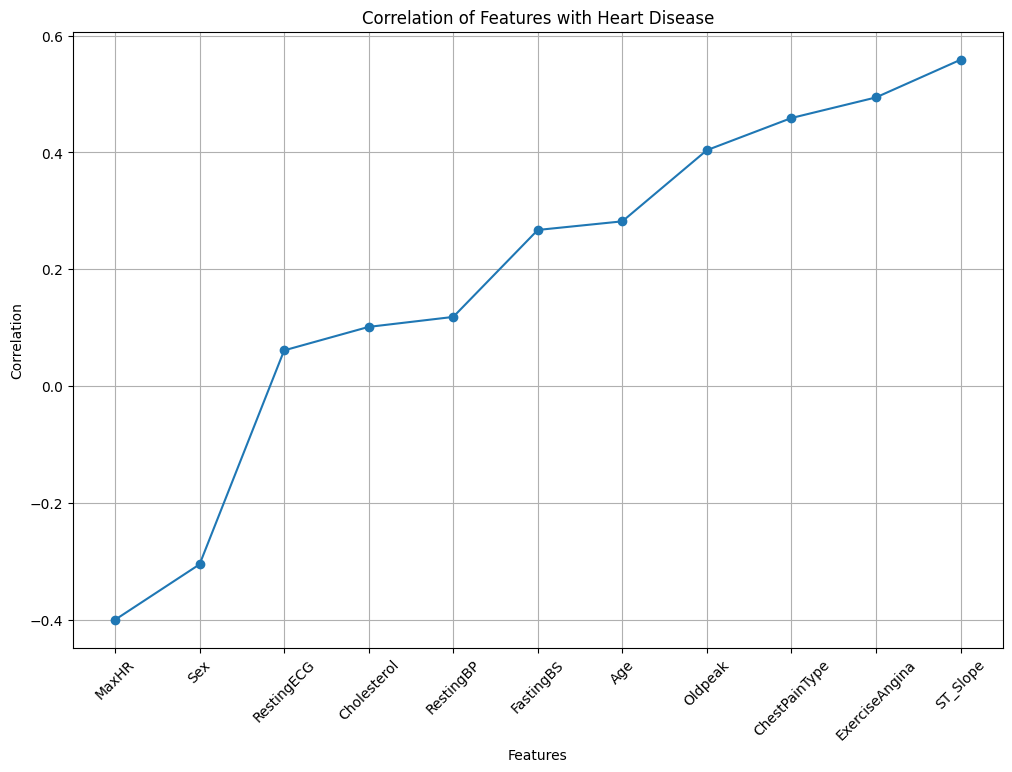

In [53]:
corr_values = df.corr(numeric_only = True)['HeartDisease'][:-1].sort_values()
plt.figure(figsize = (12,8))
plt.plot(corr_values.index, corr_values.values, marker = 'o', linestyle = '-')
plt.title("Correlation of Features with Heart Disease")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

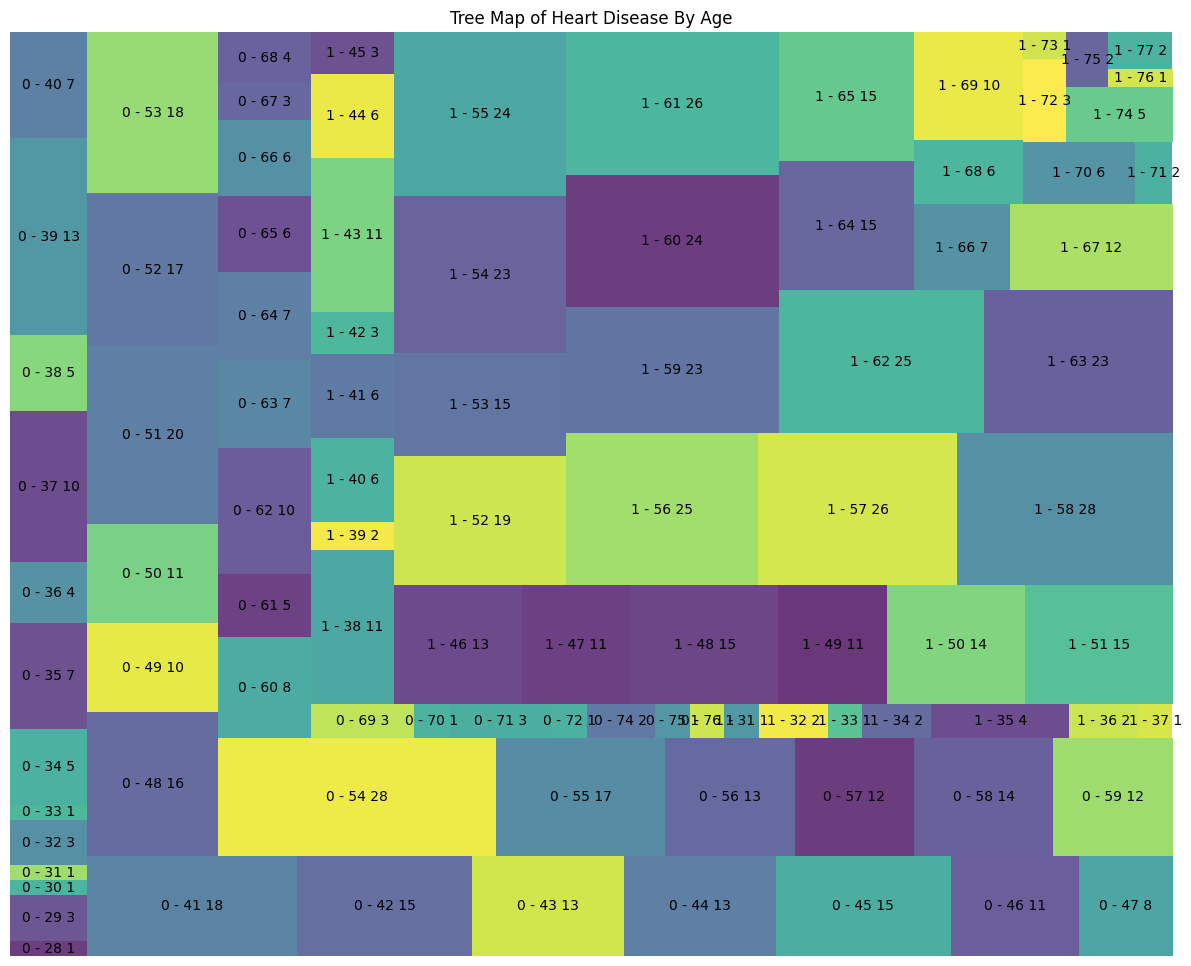

In [58]:
import squarify

counts = df.groupby(['HeartDisease', 'Age']).size().reset_index(name = 'count')
labels = counts.apply(lambda x:f"{x['HeartDisease']} - {x['Age']} {x['count']}", axis = 1)
plt.figure(figsize = (15,12))
squarify.plot(sizes = counts['count'], label = labels, alpha = 0.8)
plt.title("Tree Map of Heart Disease By Age")
plt.axis("off")
plt.show()

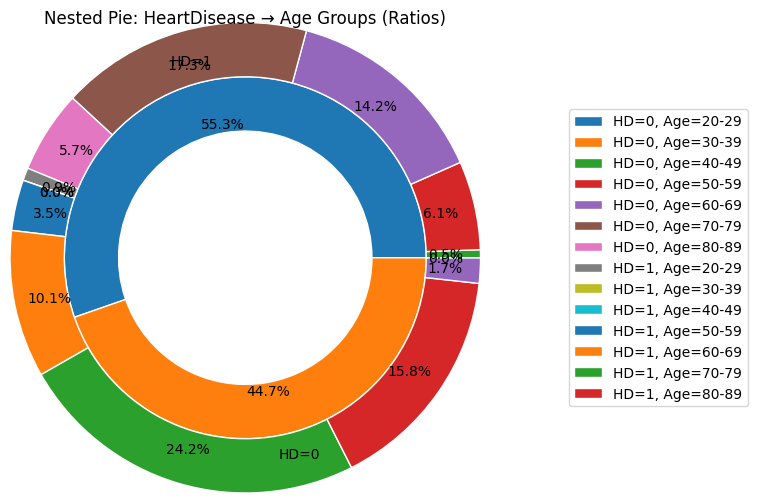

In [61]:
# 1. Bin Age into groups
df['AgeGroup'] = pd.cut(
    df['Age'], 
    bins=[20,30,40,50,60,70,80,90],
    labels=['20-29','30-39','40-49','50-59','60-69','70-79','80-89']
)

# 2. Inner ring: HeartDisease counts
hd_counts = df['HeartDisease'].value_counts()

# 3. Outer ring: HeartDisease + AgeGroup counts
outer_counts = df.groupby(['HeartDisease','AgeGroup']).size()

# 4. Build chart
fig, ax = plt.subplots(figsize=(8,8))

# Inner ring (HeartDisease)
wedges1, texts1, autotexts1 = ax.pie(
    hd_counts, 
    labels=[f"HD={i}" for i in hd_counts.index],
    radius=1, 
    autopct='%1.1f%%',   # show percentage
    pctdistance=0.75,    # position of % text
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Outer ring (HeartDisease → AgeGroup)
wedges2, texts2, autotexts2 = ax.pie(
    outer_counts, 
    labels=None,          # no text directly on pie
    radius=1.3, 
    autopct='%1.1f%%',
    pctdistance=0.85,     # % inside slices
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Add legend for outer categories
plt.legend(
    [f"HD={hd}, Age={age}" for hd, age in outer_counts.index],
    bbox_to_anchor=(1.2, 0.5), loc="center left"
)

plt.title("Nested Pie: HeartDisease → Age Groups (Ratios)")
plt.tight_layout()
plt.show()

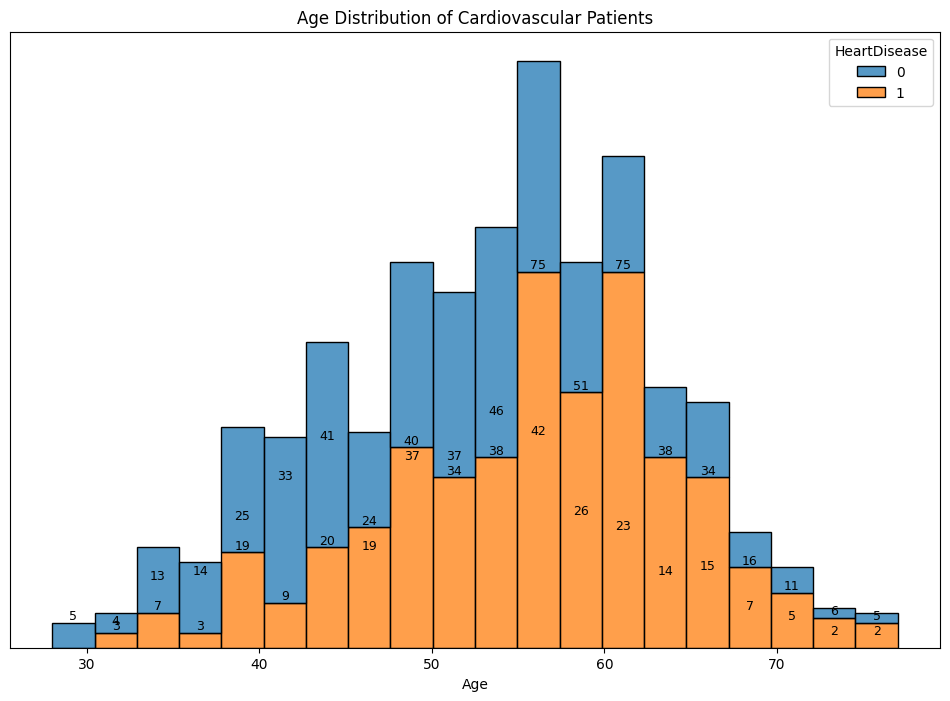

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.histplot(data = df, x='Age', hue = 'HeartDisease', multiple = 'stack', bins = 20)
plt.title("Age Distribution of Cardiovascular Patients")
plt.xlabel("Age")
plt.ylabel("")
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height, int(height), ha = 'center', va = 'bottom', fontsize = 9)
plt.show()

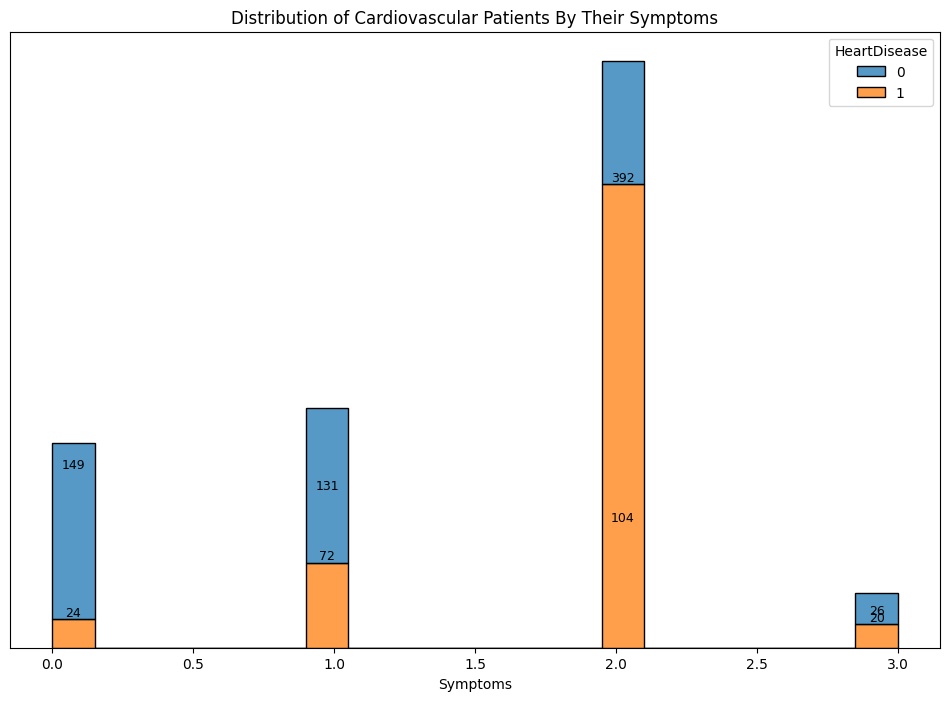

In [69]:
plt.figure(figsize = (12,8))
ax = sns.histplot(data = df, x='ChestPainType', hue = 'HeartDisease', multiple = 'stack', bins = 20)
plt.title("Distribution of Cardiovascular Patients By Their Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("")
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height, int(height), ha = 'center', va = 'bottom', fontsize = 9)
plt.show()

In [77]:
#Step 3: Training Our Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop('HeartDisease', axis = 1),
    df['HeartDisease'],
    test_size = 0.2,
    random_state = 42,
    stratify = df['HeartDisease']
)

In [95]:
#Model Training Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
best_solver = ''
test_score = np.zeros(6)
for i, n in enumerate(solver):
    lr = LogisticRegression(solver = n, max_iter = 1000).fit(x_train, y_train)
    test_score[i] = lr.score(x_test, y_test)
    if lr.score(x_test, y_test) == test_score.max():
        best_solver = n

print(best_solver)
lr = LogisticRegression(solver = best_solver, max_iter = 1000)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print(f'📉 LogisticRegression Score: {accuracy_score(y_test, lr_pred)}')
accuracy_lr = accuracy_score(y_test, lr_pred) * 100
precision_lr = precision_score(y_test, lr_pred) * 100
recall_lr = recall_score(y_test, lr_pred) * 100
f1_lr = f1_score(y_test, lr_pred) * 100

print(f"Accuracy: {accuracy_lr: .2f}%")
print(f"Precision: {precision_lr: .2f}%")
print(f"Recall: {recall_lr: .2f}%")
print(f"f1_Score: {f1_lr: .2f}%")


newton-cholesky
📉 LogisticRegression Score: 0.8586956521739131
Accuracy:  85.87%
Precision:  85.85%
Recall:  89.22%
f1_Score:  87.50%


In [96]:
#Model Training Using SVM(Support Vector Machine)
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0, 'rbf':0, 'sigmoid':0 }
best = ''
for i in kernels:
    svm = SVC(kernel = i)
    svm.fit(x_train, y_train)
    yhat = svm.predict(x_test)
    kernels[i] = f1_score(y_test, yhat, average = "weighted")
    if kernels[i] == max(kernels.values()):
        best = i


print(best)
svm = SVC(kernel = best)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print(f'SVM f1_score kernel({best}): {f1_score(y_test, svm_pred, average = "weighted")}')

accuracy_svm = accuracy_score(y_test, svm_pred) * 100
precision_svm = precision_score(y_test, svm_pred) * 100
recall_svm = recall_score(y_test, svm_pred) * 100
f1_svm = f1_score(y_test, svm_pred) * 100

print(f"Accuracy: {accuracy_svm: .2f}%")
print(f"Precision: {precision_svm: .2f}%")
print(f"Recall: {recall_svm: .2f}%")
print(f"f1_Score: {f1_svm: .2f}%")

linear
SVM f1_score kernel(linear): 0.8422922535440344
Accuracy:  84.24%
Precision:  85.44%
Recall:  86.27%
f1_Score:  85.85%


In [97]:
#Model Training Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtree = DecisionTreeClassifier(class_weight = 'balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]
}

grid_search = GridSearchCV(dtree, param_grid, cv = 5)
grid_search.fit(x_train, y_train)
ctree = DecisionTreeClassifier(**grid_search.best_params_, class_weight = 'balanced')
ctree.fit(x_train, y_train)
dtc_pred = ctree.predict(x_test)
print("🌲 DecisionTree's Accuracy: ", accuracy_score(y_test, dtc_pred))

accuracy_dt = accuracy_score(y_test, dtc_pred) * 100
precision_dt = precision_score(y_test, dtc_pred) * 100
recall_dt = recall_score(y_test, dtc_pred) * 100
f1_dt = f1_score(y_test, dtc_pred) * 100

print(f"Accuracy: {accuracy_dt: .2f}%")
print(f"Precision: {precision_dt: .2f}%")
print(f"Recall: {recall_dt: .2f}%")
print(f"f1_Score: {f1_dt: .2f}%")

🌲 DecisionTree's Accuracy:  0.8097826086956522
Accuracy:  80.98%
Precision:  83.17%
Recall:  82.35%
f1_Score:  82.76%


In [98]:
#Model Training Using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 19],
    'max_leaf_nodes': [3, 6, 9],
}  

grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(x_train, y_train)
rfctree = RandomForestClassifier(**grid_search.best_params_)
rfctree.fit(x_train, y_train)
rfc_pred = rfctree.predict(x_test)
print("🌲🌲🌲 RandomForestClassifier's Accuracy: ", accuracy_score(y_test, rfc_pred))

accuracy_rf = accuracy_score(y_test, rfc_pred) * 100
precision_rf = precision_score(y_test, rfc_pred) * 100
recall_rf = recall_score(y_test, rfc_pred) * 100
f1_rf = f1_score(y_test, rfc_pred) * 100

print(f"Accuracy: {accuracy_rf: .2f}%")
print(f"Precision: {precision_rf: .2f}%")
print(f"Recall: {recall_rf: .2f}%")
print(f"f1_Score: {f1_rf: .2f}%")


🌲🌲🌲 RandomForestClassifier's Accuracy:  0.8695652173913043
Accuracy:  86.96%
Precision:  86.11%
Recall:  91.18%
f1_Score:  88.57%


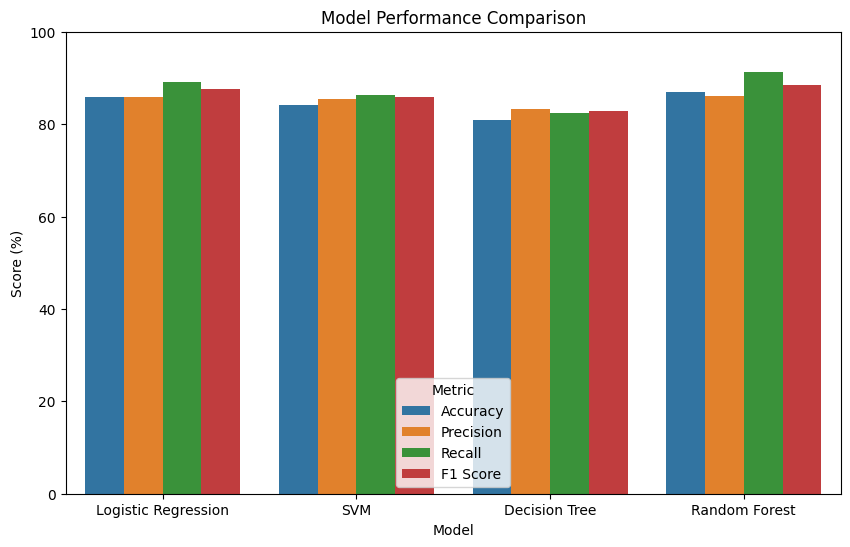

In [99]:
# Collect results from all models
results = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_rf],
    "Precision": [precision_lr, precision_svm, precision_dt, precision_rf],
    "Recall": [recall_lr, recall_svm, recall_dt, recall_rf],
    "F1 Score": [f1_lr, f1_svm, f1_dt, f1_rf]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Melt the DataFrame for plotting
df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.ylabel("Score (%)")
plt.ylim(0, 100)  # percentage scale
plt.legend(title="Metric")
plt.show()

In [105]:
#Preparing of Streamlit App file
import pickle

file = open('LogisticRegression.pkl', 'wb')
pickle.dump(lr,file)

In [104]:
#Preparing of Streamlit App file
import pickle

file = open('DecisionTree.pkl', 'wb')
pickle.dump(ctree,file)

In [102]:
#Preparing of Streamlit App file
import pickle

file = open('SVM.pkl', 'wb')
pickle.dump(svm,file)

In [109]:
#Preparing of Streamlit App file
import pickle

file = open('RandomForest.pkl', 'wb')
pickle.dump(rfctree,file)

In [108]:
#Preparing of Streamlit App file
import pickle

file = open('Gridrf.pkl', 'wb')
pickle.dump(grid_search,file)

In [107]:
import openpyxl


df.to_csv("Predicted_Heart.csv", index = False)